In [1]:
import numpy as np
import matplotlib.pyplot as plt
from neurons import *

In [2]:
res = .1
neu = Izhikevich(I=0, preset='RZ', resolution=res)
time = 1000
t = np.arange(int(time / res)) * res
print(t.shape)
vs = []
sps = []
for i in range(int(time / res)):
    sps.append(neu.dynamics())
    vs.append(neu.v)

(10000,)


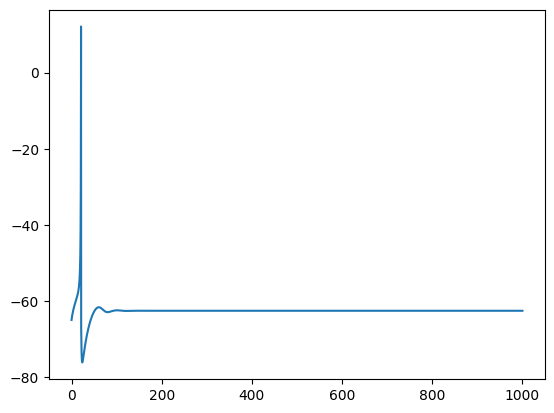

In [3]:
plt.plot(t, vs)

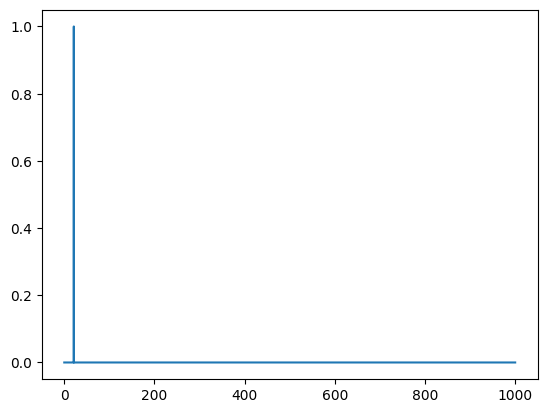

In [4]:
plt.plot(t,sps)

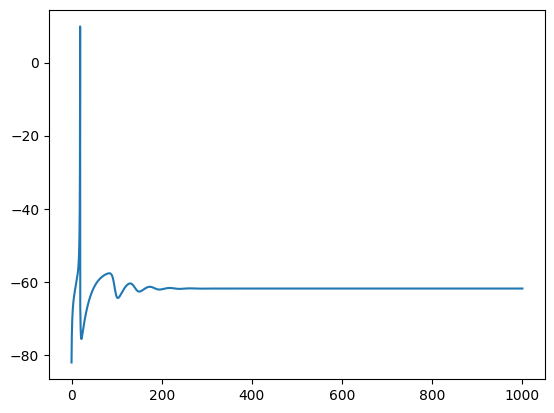

In [5]:
neu.apply_current(-100)
neu.dynamics()
sps1 = []
vs1 = []
for i in range(int(time / res)):
    sps1.append(neu.dynamics())
    vs1.append(neu.v)
    if i == int(0 / res):
        neu.apply_current(.1506)
plt.plot(t, vs1)

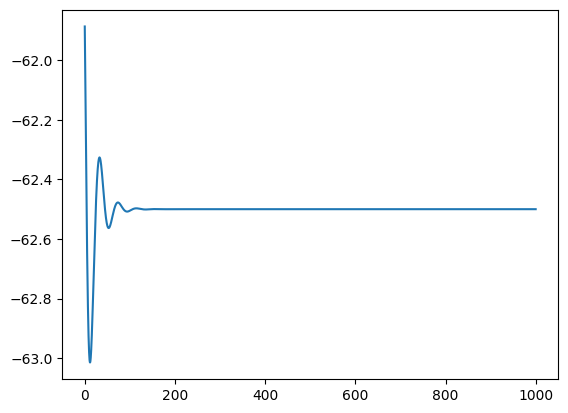

In [6]:
neu.apply_current(0)
neu.dynamics()
sps1 = []
vs1 = []
for i in range(int(time / res)):
    sps1.append(neu.dynamics())
    vs1.append(neu.v)
plt.plot(t, vs1)

In [64]:
def dev_test(neuron, time, timings, currents, default_current=0):
    t = np.arange(int(time / neuron.resolution)) * neuron.resolution
    vs = []
    spikes = []
    Is = []
    var_idx = 0
    for step in range(len(t)):
        #neuron.apply_current(default_current)
        if len(timings) > var_idx:
            if step == int(timings[var_idx] / neuron.resolution):
                neuron.apply_current(currents[var_idx])
                var_idx += 1
        spikes.append(neuron.dynamics())
        Is.append(neuron.I)
        vs.append(neuron.v)
        
    return vs, Is, spikes,t 

In [65]:
time = 100
timings = [50,51,52]
currents = [-100,0, -100, -100, -100, -100]
neu1 = Izhikevich(I=0, preset='RZ', resolution=res)
vs, Is, spikes, t = dev_test(neu1, time, timings, currents)

In [66]:
def show_stats(vs, Is, spikes, t):
    figure, axis = plt.subplots(3, 1)
    figure.set_figwidth(15)
    figure.set_figheight(9)
    voltage = axis[0]
    cur = axis[1]
    spks = axis[2]
    voltage.plot(t, vs)
    voltage.set_title('Voltage')
    cur.plot(t, Is)
    cur.set_title('Input current')
    spks.plot(t, spikes)
    spks.set_title('Spikes')

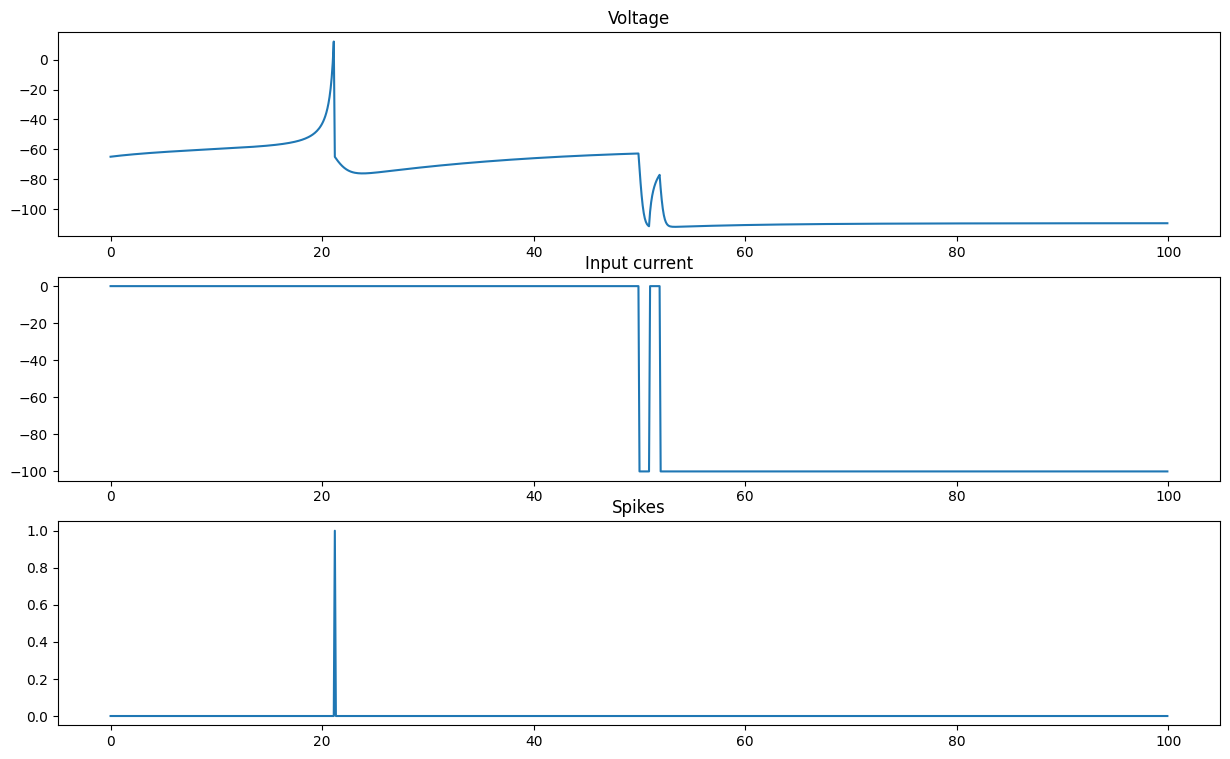

In [67]:
show_stats(vs, Is, spikes, t)